In [1]:
import numpy as np
# import cv2
import tifffile as tiff
from shapely.geometry import Polygon, mapping, shape, box
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
# import json
from rasterio import features
import scanpy as sc
import pandas as pd
import geopandas as gpd

import pickle
import scipy

import seaborn as sns

from SGanalysis.SGobject import SGobject

import matplotlib
%matplotlib inline
# matplotlib.use('Qt5Agg')
# %matplotlib qt

In [2]:

from SGanalysis.SGobject import SGobject

In [3]:
# filepath  = '/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/Shared_Grant/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/'
filepath = '/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/'

# roi_2
roi_name = 'roi_2'

In [4]:
with open(f'{filepath}{roi_name}/exports/sg_object_decode_20240314_segmentation_1_20240521.pkl', 'rb') as f:
    sg_obj = pickle.load(f)

In [21]:
df = sg_obj.get_cell_gene_table_df()

barcode_cols = ['bc_{:03d}'.format(i) for i in range(1,97)]
gene_cols = [col for col in df.columns if 'bc_' not in col and col not in ['object_id','cell_id','called_barcodes','n_called_barcodes','barcode_names']]

No filtering available or applied.


In [22]:
# find number of cells with at least cutoff spots per barcode

# cutoff = 1
cutoff = 2
# cutoff = 3

n_cells = {}

for bc in ['bc_{:03d}'.format(i) for i in range(1,97)]:
    n_cells[bc] = len(df[df[bc]>cutoff][bc].values)


In [23]:
sg_obj.gdf['nucleus_centroid'] = sg_obj.gdf['nucleus'].centroid.values

In [24]:
sg_obj.gdf

,object_id,nucleus,nucleus_centroid,object_id_str
0,35,"POLYGON ((9279.000 2.000, 9349.000 3.000, 9356...",POINT (9310.387 8.913),35
1,34,"POLYGON ((6437.000 2.000, 6520.000 2.000, 6527...",POINT (6475.859 12.348),34
2,29,"POLYGON ((24636.000 0.000, 24762.000 0.000, 24...",POINT (24695.071 14.397),29
3,11,"POLYGON ((11474.000 0.000, 11542.000 0.000, 11...",POINT (11512.465 18.850),11
4,15,"POLYGON ((14595.000 0.000, 14678.000 2.000, 14...",POINT (14620.955 16.886),15
...,...,...,...,...
16371,16364,"POLYGON ((19896.000 35571.000, 19914.000 35571...",POINT (19899.601 35594.028),16364
16372,16375,"POLYGON ((20380.000 35592.000, 20408.000 35596...",POINT (20379.341 35601.878),16375
16373,16361,"POLYGON ((22881.000 35565.000, 22904.000 35566...",POINT (22879.829 35591.004),16361
16374,16357,"POLYGON ((24819.000 35560.000, 24840.000 35560...",POINT (24816.056 35588.584),16357


In [25]:
df

,object_id,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,...,bc_087,bc_088,bc_089,bc_090,bc_091,bc_092,bc_093,bc_094,bc_095,bc_096
0,35.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,16364.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
16372,16375.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16373,16361.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16374,16357.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
sg_obj.gdf['object_id']

sg_obj.gdf['object_id_str'] = sg_obj.gdf['object_id'].astype(int)
df['object_id'] = [int(float(x)) for x in df['object_id'].values]

In [27]:
df

,object_id,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,...,bc_087,bc_088,bc_089,bc_090,bc_091,bc_092,bc_093,bc_094,bc_095,bc_096
0,35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,16364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
16372,16375,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16373,16361,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16374,16357,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
cell_barcodes = {}



# df.sort_index(inplace=True)

df['cell_id'] = df['object_id']

for cell_id in df['cell_id']:
    this_cell = df[df['cell_id']==cell_id]
    cell_barcodes[cell_id] = []

    for bc in barcode_cols:
        if this_cell[bc].values[0] > cutoff:
            cell_barcodes[cell_id].append(bc)

df['called_barcodes'] = cell_barcodes.values()
df['n_called_barcodes'] = [len(bc_set) for bc_set in cell_barcodes.values()]
df['barcode_names'] = ['-'.join(sorted(bc_set)) for bc_set in cell_barcodes.values()]

# df = pd.merge(df,sg_obj.gdf,how='left',on='object_id')
df = pd.merge(df,sg_obj.gdf,how='left',left_on='object_id',right_on='object_id_str')

# df['object_id'] = df['object_id_x']

# get each cell polygon's position
# df['location'] = sg_obj.gdf['nucleus'].centroid.values
# df['location_x'] = sg_obj.gdf['nucleus'].centroid.x.values
# df['location_y'] = sg_obj.gdf['nucleus'].centroid.y.values

In [16]:
df

,object_id_x,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,...,bc_095,bc_096,cell_id,called_barcodes,n_called_barcodes,barcode_names,object_id_y,nucleus,nucleus_centroid,object_id_str
0,35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0.0,0.0,35,[],0,,35,"POLYGON ((9279.000 2.000, 9349.000 3.000, 9356...",POINT (9310.387 8.913),35
1,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,34,[bc_030],1,bc_030,34,"POLYGON ((6437.000 2.000, 6520.000 2.000, 6527...",POINT (6475.859 12.348),34
2,29,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,...,0.0,0.0,29,[bc_078],1,bc_078,29,"POLYGON ((24636.000 0.000, 24762.000 0.000, 24...",POINT (24695.071 14.397),29
3,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,...,0.0,0.0,11,[],0,,11,"POLYGON ((11474.000 0.000, 11542.000 0.000, 11...",POINT (11512.465 18.850),11
4,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,...,0.0,0.0,15,"[bc_018, bc_060]",2,bc_018-bc_060,15,"POLYGON ((14595.000 0.000, 14678.000 2.000, 14...",POINT (14620.955 16.886),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,16364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,8.0,...,8.0,0.0,16364,"[bc_035, bc_066, bc_095]",3,bc_035-bc_066-bc_095,16364,"POLYGON ((19896.000 35571.000, 19914.000 35571...",POINT (19899.601 35594.028),16364
16372,16375,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,16375,[],0,,16375,"POLYGON ((20380.000 35592.000, 20408.000 35596...",POINT (20379.341 35601.878),16375
16373,16361,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,12.0,...,0.0,0.0,16361,"[bc_019, bc_030, bc_085]",3,bc_019-bc_030-bc_085,16361,"POLYGON ((22881.000 35565.000, 22904.000 35566...",POINT (22879.829 35591.004),16361
16374,16357,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,9.0,...,0.0,0.0,16357,"[bc_012, bc_022, bc_055]",3,bc_012-bc_022-bc_055,16357,"POLYGON ((24819.000 35560.000, 24840.000 35560...",POINT (24816.056 35588.584),16357


In [14]:
sister_cells = {}
for bc_set in np.unique(df[df['n_called_barcodes']>4]['barcode_names'].values):
    if len(df[df['barcode_names']==bc_set]) > 3:

        sister_cells[bc_set] = df[df['barcode_names']==bc_set].index

In [17]:
df

,object_id_x,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,...,bc_095,bc_096,cell_id,called_barcodes,n_called_barcodes,barcode_names,object_id_y,nucleus,nucleus_centroid,object_id_str
0,35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0.0,0.0,35,[],0,,35,"POLYGON ((9279.000 2.000, 9349.000 3.000, 9356...",POINT (9310.387 8.913),35
1,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,34,[bc_030],1,bc_030,34,"POLYGON ((6437.000 2.000, 6520.000 2.000, 6527...",POINT (6475.859 12.348),34
2,29,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,...,0.0,0.0,29,[bc_078],1,bc_078,29,"POLYGON ((24636.000 0.000, 24762.000 0.000, 24...",POINT (24695.071 14.397),29
3,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,...,0.0,0.0,11,[],0,,11,"POLYGON ((11474.000 0.000, 11542.000 0.000, 11...",POINT (11512.465 18.850),11
4,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,...,0.0,0.0,15,"[bc_018, bc_060]",2,bc_018-bc_060,15,"POLYGON ((14595.000 0.000, 14678.000 2.000, 14...",POINT (14620.955 16.886),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,16364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,8.0,...,8.0,0.0,16364,"[bc_035, bc_066, bc_095]",3,bc_035-bc_066-bc_095,16364,"POLYGON ((19896.000 35571.000, 19914.000 35571...",POINT (19899.601 35594.028),16364
16372,16375,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,16375,[],0,,16375,"POLYGON ((20380.000 35592.000, 20408.000 35596...",POINT (20379.341 35601.878),16375
16373,16361,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,12.0,...,0.0,0.0,16361,"[bc_019, bc_030, bc_085]",3,bc_019-bc_030-bc_085,16361,"POLYGON ((22881.000 35565.000, 22904.000 35566...",POINT (22879.829 35591.004),16361
16374,16357,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,9.0,...,0.0,0.0,16357,"[bc_012, bc_022, bc_055]",3,bc_012-bc_022-bc_055,16357,"POLYGON ((24819.000 35560.000, 24840.000 35560...",POINT (24816.056 35588.584),16357


In [29]:
gene_cols

['AKT1',
 'AXL',
 'BGN',
 'BIRC3',
 'BIRC5',
 'BMP2',
 'BMP4',
 'CALD1',
 'CAPG',
 'CCNA2',
 'CCND1',
 'CD36',
 'CDK1',
 'CDKN1A',
 'CDKN1B',
 'COL1A1',
 'COL5A2',
 'COL9A3',
 'CTNNB1',
 'DCN',
 'DKK3',
 'EGFR',
 'ENSMUSG00000071361',
 'ERBB3',
 'ESPN',
 'FGF1',
 'FGFR1',
 'FN1',
 'FOS',
 'FOSB',
 'FOSL1',
 'FOSL2',
 'FOXF2',
 'GPX8',
 'GTSE1',
 'HIF1A',
 'HK2',
 'IFIT2',
 'IGFBP2',
 'IGFBP7',
 'IRX3',
 'ITGA3',
 'ITGA5',
 'ITGA6',
 'ITGA8',
 'ITGAV',
 'JUN',
 'KIT',
 'KLF4',
 'L1CAM',
 'LMOD1',
 'LOXL2',
 'MAPK14',
 'MEF2C',
 'MERTK',
 'MET',
 'MITF',
 'MKI67',
 'MLANA',
 'MMP1',
 'MMP11',
 'MYBL2',
 'MYC',
 'MYLK',
 'MYOCD',
 'NANOG',
 'NCAM1',
 'NFATC2',
 'NFE2L2',
 'NGFR',
 'NOTCH3',
 'NOTCH4',
 'NRG1',
 'NT5E',
 'OASL',
 'PDGFA',
 'PDGFC',
 'PDGFRB',
 'PKDCC',
 'PRKCA',
 'PRRX1',
 'RGS2',
 'RIGI',
 'ROR1',
 'ROR2',
 'RUNX2',
 'SERPINE1',
 'SERPINF1',
 'SFRP1',
 'SFRP4',
 'SLC7A8',
 'SLIT2',
 'SMAD3',
 'SNAI1',
 'SNAI2',
 'SOX10',
 'SOX2',
 'SOX9',
 'SPARC',
 'TAFAZZIN',
 'TAGLN',


In [134]:
adata_genes = sc.AnnData(df[gene_cols])

# adata_genes.obs['cell_id'] = df['cell_id'].values
# adata_genes.obs['object_id'] = df['object_id_x'].values
# adata_genes.obs['n_called_barcodes'] = df['n_called_barcodes'].values
# adata_genes.obs['nucleus_centroid'] = df['nucleaus_centroid'].values
# adata_genes.obs['barcode_names'] = df['barcode_names'].values
# adata_genes.obs['called_barcodes'] = df['called_barcodes'].values
# adata_genes.obs['location_x'] = sg_obj.gdf['nucleus'].centroid.x.values

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [135]:
adata_genes.to_df()

,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,CCNA2,...,TRPM1,TYR,VCAM1,VEGFA,VEGFC,VGF,WNT5A,YAP1,ZEB1,ZEB2
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,8.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16372,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16373,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,12.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
16374,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,9.0,1.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [136]:
## default highly variable gene identification (seurat) is applied to log(1+x) counts
## this normalization 
sc.pp.log1p(adata_genes)
sc.pp.highly_variable_genes(adata_genes, n_top_genes=30)

## seurat v3 normalization is applied to the counts directly, 
# sc.pp.highly_variable_genes(adata_genes,n_top_genes=30,flavor='seurat_v3')
# sc.pp.highly_variable_genes(adata_genes, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat_v3')
# sc.pp.pca(adata_genes)

# sc.pp.highly_variable_genes(adata_genes,n_top_genes=30,flavor='seurat_v3')

In [137]:
# for entry in adata_genes.var

color_dict = {True:'r',False:'k'}

plt.figure()

plt.scatter(adata_genes.var['means'].values,adata_genes.var['variances_norm'].values,
            marker='.',s=5,color=[color_dict[x] for x in adata_genes.var['highly_variable']])

for gene in adata_genes.var.index:
    if adata_genes.var['highly_variable_rank'].loc[gene] < 20:
        plt.text(adata_genes.var['means'].loc[gene],adata_genes.var['variances_norm'].loc[gene],gene,fontsize=8)

KeyError: 'variances_norm'

<Figure size 640x480 with 0 Axes>

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


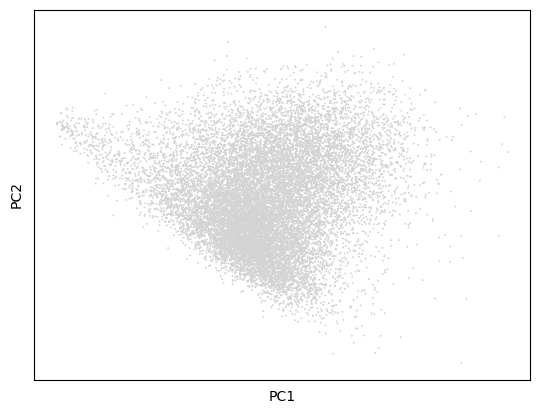

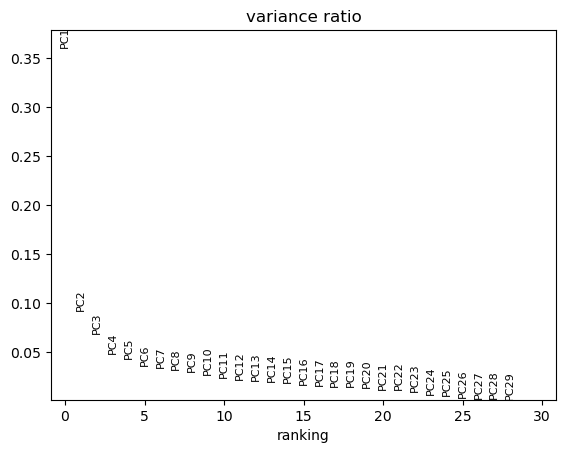

In [138]:
sc.pp.pca(adata_genes)
sc.pl.pca(adata_genes)
sc.pl.pca_variance_ratio(adata_genes, log=False)

In [139]:
sc.pp.neighbors(adata_genes)

In [140]:
# sc.pp.scale(adata_genes)
sc.tl.umap(adata_genes)
sc.tl.leiden(adata_genes, n_iterations=-1)

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


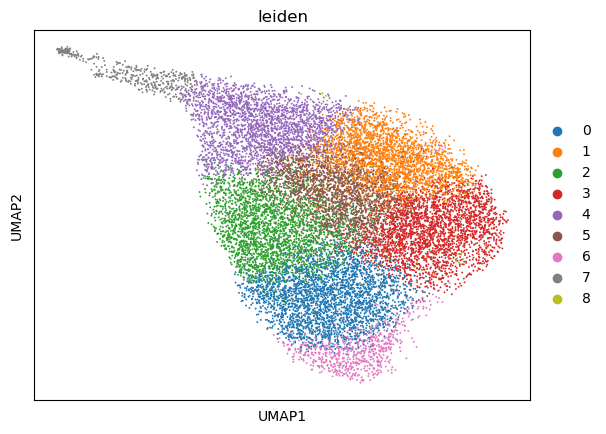

In [141]:
sc.pl.umap(adata_genes, color=["leiden"])

ok, so now we have a UMAP with clusters of the cells. We can now ask whether sisters are closer to each other in this space than expected by chance.

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


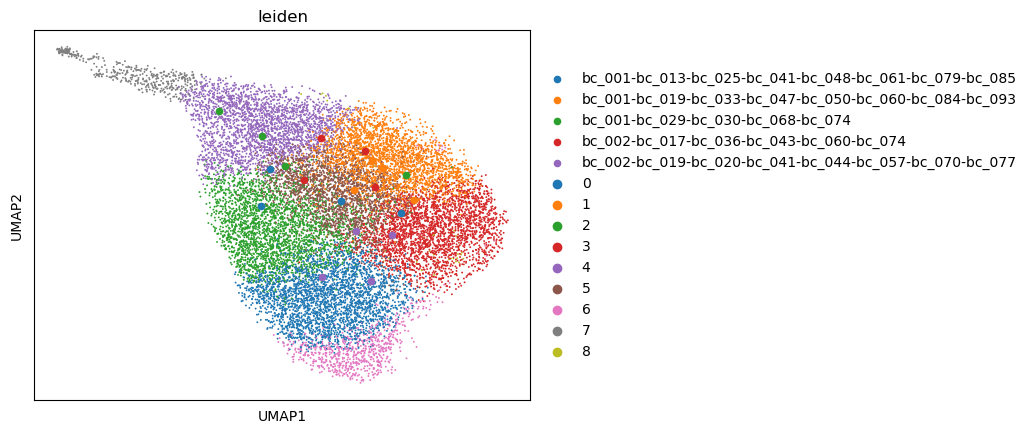

In [142]:
fig,ax = plt.subplots()
for b,(bc_set,ix) in enumerate(sister_cells.items()):
    if b < 5:
        umap_coords = adata_genes[ix].obsm['X_umap']
        ax.scatter(umap_coords[:,0],umap_coords[:,1],s=20,zorder=10,label=bc_set) 
sc.pl.umap(adata_genes, color=["leiden"],ax=ax)

 

it sort of appears that sisters are closer to each other. However, we haven't yet accounted for cell cycle, which could make sisters look more different from each other by itself.

In [143]:
cell_cycle_genes = [x.strip() for x in open('../data/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata_genes.var_names]

In [144]:
sc.tl.score_genes(adata_genes,cell_cycle_genes,score_name='g2m_score')

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


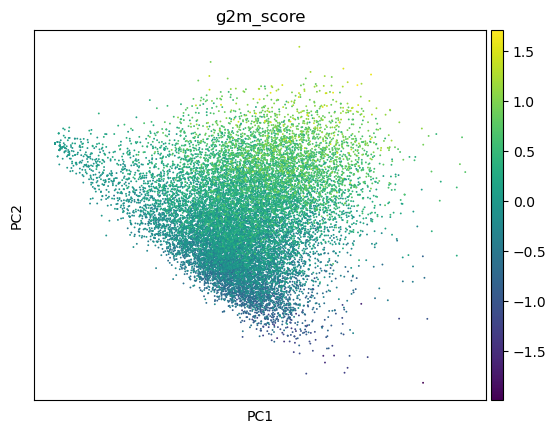

In [145]:
sc.pl.pca(adata_genes,color='g2m_score')

cell cycle does strongly correlated with the first 2 pcs. we can now regress this out.

In [146]:
sc.pp.regress_out(adata_genes, ['g2m_score'])
sc.pp.scale(adata_genes)

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


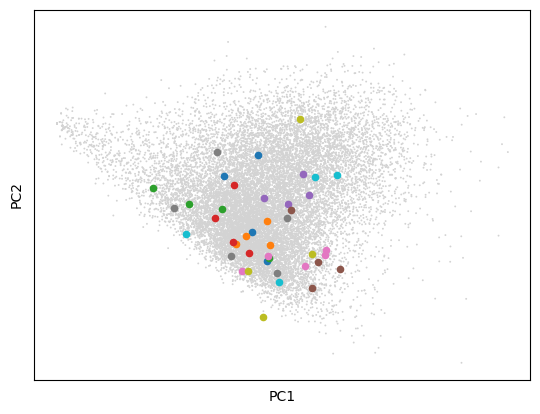

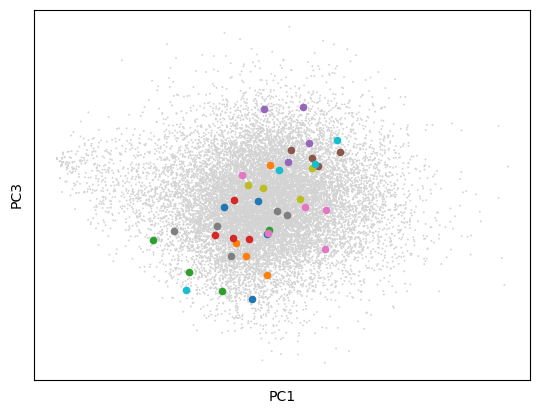

In [147]:
fig,ax = plt.subplots()
for b,(bc_set,ix) in enumerate(sister_cells.items()):
    if b < 10:
        pca_coords = adata_genes[ix].obsm['X_pca']
        ax.scatter(pca_coords[:,0],pca_coords[:,1],s=20,zorder=10,label=bc_set) 

sc.pl.pca(adata_genes,ax=ax,components='1,2')


fig,ax = plt.subplots()
for b,(bc_set,ix) in enumerate(sister_cells.items()):
    if b < 10:
        pca_coords = adata_genes[ix].obsm['X_pca']
        ax.scatter(pca_coords[:,0],pca_coords[:,2],s=20,zorder=10,label=bc_set) 

sc.pl.pca(adata_genes,ax=ax,components='1,3')
# ax.legend()
# fig.savefig('pca_sister_cells_G2Mregressed.pdf',bbox_inches='tight')
# fig.savefig('pca_sister_cells_G2Mregressed.png',dpi=300,bbox_inches='tight')

by eye, it definitely looks like sisters are very close in this space. let's see what happens when we 

In [167]:
sister_cells_more = {}
for bc_set in np.unique(df[df['n_called_barcodes']>3]['barcode_names'].values):
    if len(df[df['barcode_names']==bc_set]) > 1:

        # sister_cells_more[bc_set] = df[df['barcode_names']==bc_set]['object_id_x'].values
        sister_cells_more[bc_set] = df[df['barcode_names']==bc_set]['object_id_x'].index

sisterhood_by_cell_ix = {i:bc_set for bc_set,ix in sister_cells_more.items() for i in ix}
sister_ids_by_cell_ix = {i:list(sister_cells_more[bc_set]) for bc_set,ix in sister_cells_more.items() for i in ix}

In [168]:
df[df['barcode_names']==bc_set]

,object_id_x,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,...,bc_095,bc_096,cell_id,called_barcodes,n_called_barcodes,barcode_names,object_id_y,nucleus,nucleus_centroid,object_id_str
1569,1568,5.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,41.0,...,0.0,0.0,1568,"[bc_083, bc_085, bc_089, bc_092]",4,bc_083-bc_085-bc_089-bc_092,1568,"POLYGON ((25133.000 3906.000, 25173.000 3908.0...",POINT (25146.866 3961.561),1568


In [169]:
sister_cells_more

{'bc_001-bc_002-bc_028-bc_067-bc_081-bc_095': Int64Index([14298, 14326], dtype='int64'),
 'bc_001-bc_002-bc_030-bc_041-bc_043-bc_083': Int64Index([8154, 8268], dtype='int64'),
 'bc_001-bc_002-bc_030-bc_041-bc_083': Int64Index([8129, 8302], dtype='int64'),
 'bc_001-bc_002-bc_060-bc_091': Int64Index([7279, 7637, 7688], dtype='int64'),
 'bc_001-bc_003-bc_006-bc_060-bc_064-bc_070': Int64Index([10709, 10778, 11049], dtype='int64'),
 'bc_001-bc_003-bc_008-bc_047-bc_092': Int64Index([5235, 5284, 5696], dtype='int64'),
 'bc_001-bc_003-bc_011-bc_059-bc_078-bc_094-bc_095': Int64Index([15255, 15280], dtype='int64'),
 'bc_001-bc_003-bc_022-bc_068-bc_090': Int64Index([11344, 11389], dtype='int64'),
 'bc_001-bc_003-bc_035-bc_058-bc_070-bc_092': Int64Index([5141, 5172, 5274], dtype='int64'),
 'bc_001-bc_004-bc_005-bc_009-bc_038-bc_066': Int64Index([10169, 10211], dtype='int64'),
 'bc_001-bc_004-bc_009-bc_038-bc_066': Int64Index([10232, 10306], dtype='int64'),
 'bc_001-bc_004-bc_025-bc_060-bc_076-bc_0

In [170]:

centroid_array = np.stack(sg_obj.gdf['nucleus_centroid'].apply(lambda x: np.array(x.coords).ravel()))

distance_matrix = scipy.spatial.distance.pdist(centroid_array)
square_distance_matrix =scipy.spatial.distance.squareform(distance_matrix)

# get neighbors of a focal cell


def find_neighbors(ix,distance_matrix,threshold):
    # ix = df.index
    # this_ix = np.where(df['cell_id'] == cell_id)[0][0]

    # print(this_ix)
    neighbor_ix  = np.where(distance_matrix[ix,:] < threshold)[0]
    neighbor_ix = neighbor_ix[neighbor_ix != ix]    

    # neighbors = [x for x in df['cell_id'].values[neighbor_ix] if x !=cell_id]
     
    return neighbor_ix

def find_non_sister_neighbors(ix,sisters,distance_matrix,threshold):
    neighbors = find_neighbors(ix,distance_matrix,threshold)
    non_sister_neighbors = [x for x in neighbors if x not in sisters]
    return non_sister_neighbors


def find_neighbors_by_cell_id(cell_id,df,distance_matrix,threshold):
    # ix = df.index
    this_ix = np.where(df['cell_id'] == cell_id)[0][0]

    # print(this_ix)
    neighbor_ix  = np.where(distance_matrix[this_ix,:] < threshold)[0]

    neighbors = [x for x in df['cell_id'].values[neighbor_ix] if x!=cell_id]
     
    return neighbors




In [171]:
len(sister_cells_more)

1005

In [172]:
sister_more_dists = []
randos = []
neighbors= []
non_sister_neighbors = []

neighbor_distance = 3000

# all_ids = df.index
# all_ids = range(len(df))
all_ids = range(len(adata_genes))

pcs_to_use = 10

for b,(bc_set,ix) in enumerate(sister_cells_more.items()):
    # if b < 10:
    print(ix)
    print(list(ix))

    pca_coords = adata_genes[list(ix)].obsm['X_pca']

    d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # calculate distance using top 20 PCs
    sister_more_dists.append(np.mean(d))

    print('1')


    pca_coords = adata_genes[np.random.choice(all_ids,len(ix))].obsm['X_pca']
    d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # calculate distance using top 20 PCs
    randos.append(np.mean(d))

    print('2')

    random_cell = np.random.choice(all_ids,1)[0]
    these_neighbors = find_neighbors(random_cell,square_distance_matrix,neighbor_distance)
    pca_coords = adata_genes[np.random.choice(these_neighbors,len(ix))].obsm['X_pca']
    d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # calculate distance using top 20 PCs
    neighbors.append(np.mean(d))

    print('3')

    # random_cell = np.random.choice(all_ids,1)[0]
    # if random_cell in sisterhood_by_cell_ix:
    #     these_neighbors = find_non_sister_neighbors(random_cell,sister_ids_by_cell_ix[random_cell],square_distance_matrix,neighbor_distance)
    # else:   
    #     these_neighbors = find_neighbors(random_cell,square_distance_matrix,neighbor_distance)
    # pca_coords = adata_genes[np.random.choice(these_neighbors,len(ix))].obsm['X_pca']
    # d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # calculate distance using top 20 PCs
    # non_sister_neighbors.append(np.mean(d))
    

        # neighbors = find_non_sister_neighbors(random_cell,ix,df,square_distance_matrix,2000)





# n_sims = 1000

# randos = np.zeros((n_sims,len(sister_cells_more)))

# for n in range(n_sims):
#     for b,(bc_set,ix) in enumerate(sister_cells_more.items()):
#         # if b < 10:
#             # pca_coords = adata_genes[ix].obsm['X_pca']

#             # d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # caluclate distance using top 20 PCs
#             # sister_more_dists.append(np.mean(d))


#             pca_coords = adata_genes[np.random.choice(all_ids,len(ix))].obsm['X_pca']
#             d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # caluclate distance using top 20 PCs
#             randos[n,b] = np.mean(d)






Int64Index([14298, 14326], dtype='int64')
[14298, 14326]
1
2
3
Int64Index([8154, 8268], dtype='int64')
[8154, 8268]
1
2
3
Int64Index([8129, 8302], dtype='int64')
[8129, 8302]
1
2
3
Int64Index([7279, 7637, 7688], dtype='int64')
[7279, 7637, 7688]
1
2
3
Int64Index([10709, 10778, 11049], dtype='int64')
[10709, 10778, 11049]
1
2
3
Int64Index([5235, 5284, 5696], dtype='int64')
[5235, 5284, 5696]
1
2
3
Int64Index([15255, 15280], dtype='int64')
[15255, 15280]
1
2
3
Int64Index([11344, 11389], dtype='int64')
[11344, 11389]
1
2
3
Int64Index([5141, 5172, 5274], dtype='int64')
[5141, 5172, 5274]
1
2
3
Int64Index([10169, 10211], dtype='int64')
[10169, 10211]
1
2
3
Int64Index([10232, 10306], dtype='int64')
[10232, 10306]
1
2
3
Int64Index([4479, 4582], dtype='int64')
[4479, 4582]
1
2
3
Int64Index([5609, 5659], dtype='int64')
[5609, 5659]
1
2
3
Int64Index([4628, 5230], dtype='int64')
[4628, 5230]
1
2
3
Int64Index([7747, 7785], dtype='int64')
[7747, 7785]
1
2
3
Int64Index([228, 235, 288], dtype='int64'

In [173]:
len(adata_genes)

16376

Text(0.5, 0, 'Mean distance between sisters')

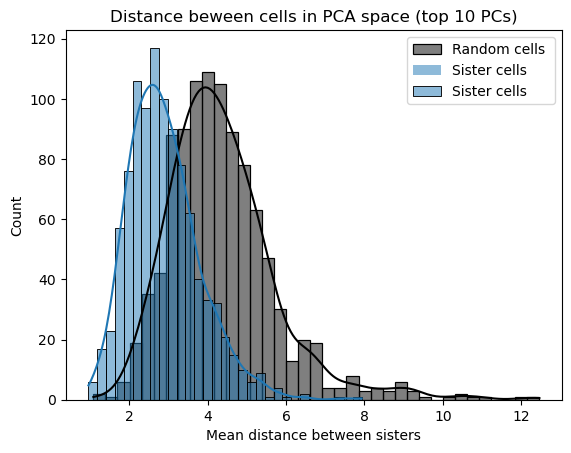

In [174]:
fig,ax = plt.subplots()
sns.histplot(randos,ax=ax,color='k',kde=True,alpha=0.5,label='Random cells ')
sns.histplot(sister_more_dists,ax=ax,kde=True,alpha=0.5,label='Sister cells')
# sns.kdeplot(randos,ax=ax,color='gray',alpha=0.5)
# sns.kdeplot(sister_more_dists,ax=ax,alpha=0.5)
plt.legend()
plt.title(f'Distance beween cells in PCA space (top {pcs_to_use} PCs)')
plt.xlabel('Mean distance between sisters')
# plt.savefig(f'sister_cell_distances_withrandom_{pcs_to_use}PCs.pdf',bbox_inches='tight')



Text(0.5, 0, 'Mean distance between sisters')

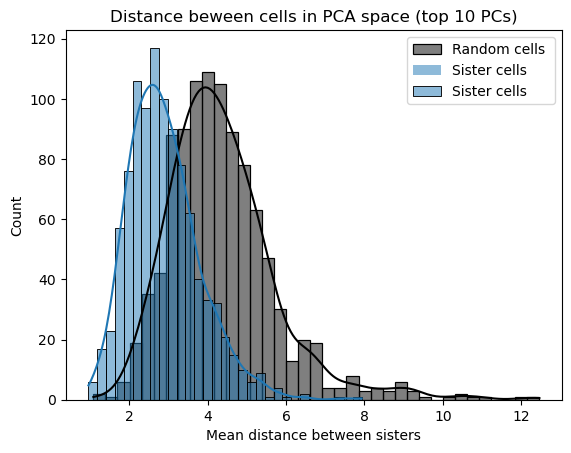

In [175]:
fig,ax = plt.subplots()
sns.histplot(randos,ax=ax,color='k',kde=True,alpha=0.5,label='Random cells ')
sns.histplot(sister_more_dists,ax=ax,kde=True,alpha=0.5,label='Sister cells')
# sns.kdeplot(randos,ax=ax,color='gray',alpha=0.5)
# sns.kdeplot(sister_more_dists,ax=ax,alpha=0.5)
plt.legend()
plt.title(f'Distance beween cells in PCA space (top {pcs_to_use} PCs)')
plt.xlabel('Mean distance between sisters')
# plt.savefig(f'sister_cell_distances_withrandom_{pcs_to_use}PCs.pdf',bbox_inches='tight')



how does this change as a function of how many sisters there are? In general, we should expect that sisterhoods of larger sizes should be more like random, as memory becomes diluted over cell divisions. 

In [156]:
n_sisters  = []
sister_more_dists = []

for b,(bc_set,ix) in enumerate(sister_cells_more.items()):
    # if b < 10:
        pca_coords = adata_genes[ix].obsm['X_pca']

        d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # caluclate distance using top 20 PCs
        sister_more_dists.append(np.mean(d))
        n_sisters.append(len(ix))


        # pca_coords = adata_genes[np.random.choice(all_ids,len(ix))].obsm['X_pca']
        # d = scipy.spatial.distance.pdist(pca_coords[:,:pcs_to_use]) # caluclate distance using top 20 PCs
        # randos.append(np.mean(d))

Text(0.5, 0, 'Mean distance between sisters')

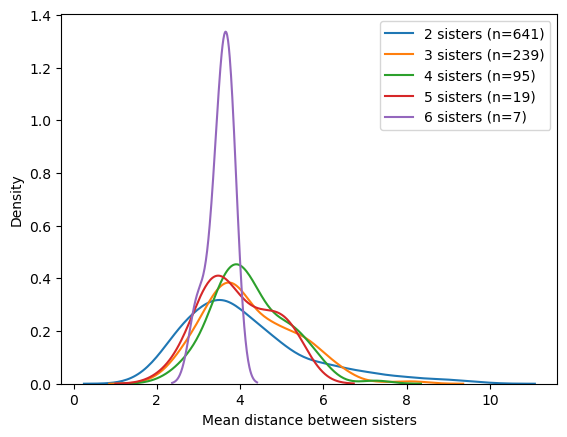

In [157]:
for n in [2,3,4,5,6]:
    # locations with this many sisters
    ix = np.where(np.array(n_sisters) == n)[0]
    sister_dists_here = [sister_more_dists[i] for i in ix]
    # sns.histplot(sister_dists_here,label=n,stat='density')
    sns.kdeplot(sister_dists_here,label=f'{n} sisters (n={len(sister_dists_here)})')
plt.legend()
plt.xlabel('Mean distance between sisters')

indeed, sisterhoods of 2 have the most similar 

In [158]:
# ok what about IFIT2 and OASL?



In [159]:
sister_cells_more

{'bc_001-bc_002-bc_028-bc_067-bc_081-bc_095': array([14314, 14336]),
 'bc_001-bc_002-bc_030-bc_041-bc_043-bc_083': array([8159, 8265]),
 'bc_001-bc_002-bc_030-bc_041-bc_083': array([8128, 8301]),
 'bc_001-bc_002-bc_060-bc_091': array([7282, 7648, 7687]),
 'bc_001-bc_003-bc_006-bc_060-bc_064-bc_070': array([10714, 10782, 11050]),
 'bc_001-bc_003-bc_008-bc_047-bc_092': array([5232, 5290, 5681]),
 'bc_001-bc_003-bc_011-bc_059-bc_078-bc_094-bc_095': array([15254, 15280]),
 'bc_001-bc_003-bc_022-bc_068-bc_090': array([11344, 11380]),
 'bc_001-bc_003-bc_035-bc_058-bc_070-bc_092': array([5145, 5170, 5261]),
 'bc_001-bc_004-bc_005-bc_009-bc_038-bc_066': array([10179, 10208]),
 'bc_001-bc_004-bc_009-bc_038-bc_066': array([10235, 10308]),
 'bc_001-bc_004-bc_025-bc_060-bc_076-bc_096': array([4469, 4579]),
 'bc_001-bc_004-bc_035-bc_041-bc_053-bc_062-bc_066': array([5600, 5648]),
 'bc_001-bc_005-bc_045-bc_057-bc_066-bc_076-bc_089': array([4623, 5226]),
 'bc_001-bc_006-bc_011-bc_013-bc_028-bc_033-bc

In [180]:
sister_more_dists = []
randos = []
neighbors= []
non_sister_neighbors = []

neighbor_distance = 3000

# all_ids = df.index
# all_ids = range(len(df))
all_ids = range(len(adata_genes))

np.random.seed(19104)

genes_to_use = ['IFIT2','OASL']

gene_to_use = 'IFIT2'
gene_to_use = 'OASL'
# gene_to_use = 'SFRP1'


sister_list = []
randos_list = []
neighbors_list = []



for b,(bc_set,ix) in enumerate(sister_cells_more.items()):

    if len(bc_set) > 2:
        ix = np.random.choice(ix,2)

    sister_list.append(df.loc[ix][gene_to_use ].values)

    randos_list.append(df.loc[np.random.choice(all_ids,len(ix))][gene_to_use ].values)

    # neighbors of any random cell
    # random_cell = np.random.choice(all_ids,1)[0]
    # these_neighbors = find_neighbors(random_cell,square_distance_matrix,neighbor_distance)
    # neighbors_list.append(df.loc[np.random.choice(these_neighbors,len(ix))][gene_to_use ].values)

    # actual neighbors of one of the sisters
    these_neighbors = find_neighbors(ix[0],square_distance_matrix,neighbor_distance)
    neighbors_list.append(df.loc[np.random.choice(these_neighbors,len(ix))][gene_to_use ].values)


# # convert into a two by two matrix for each pair of sisters as to whether they are both above the cutoff
# sisters_matrix = np.zeros((2,2))
# randos_matrix = np.zeros((2,2))



In [181]:
cutoff = 1

sister_df = pd.DataFrame()
sister_df['sister_A'] = np.asarray(sister_list)[:,0] > cutoff
sister_df['sister_B'] = np.asarray(sister_list)[:,1] > cutoff

sister_crosstab = pd.crosstab(sister_df['sister_A'],sister_df['sister_B'])
print('Sister')
print(sister_crosstab)
print(scipy.stats.fisher_exact(sister_crosstab))

randos_df = pd.DataFrame()
randos_df['sister_A'] = np.asarray(randos_list)[:,0] > cutoff
randos_df['sister_B'] = np.asarray(randos_list)[:,1] > cutoff

randos_crosstab = pd.crosstab(randos_df['sister_A'],randos_df['sister_B'])
print('Random')
print(randos_crosstab)
print(scipy.stats.fisher_exact(randos_crosstab))

neighbors_df = pd.DataFrame()
neighbors_df['sister_A'] = np.asarray(neighbors_list)[:,0] > cutoff
neighbors_df['sister_B'] = np.asarray(neighbors_list)[:,1] > cutoff

neighbors_crosstab = pd.crosstab(neighbors_df['sister_A'],neighbors_df['sister_B'])

print('Neighbors')
print(neighbors_crosstab)
print(scipy.stats.fisher_exact(neighbors_crosstab))


Sister
sister_B  False  True 
sister_A              
False      1001      0
True          3      1
(inf, 0.003980099502487562)
Random
sister_B  False  True 
sister_A              
False       993      2
True         10      0
(0.0, 1.0)
Neighbors
sister_B  False  True 
sister_A              
False      1000      3
True          2      0
(0.0, 1.0)


In [96]:
np.asarray(sister_list) > 1





array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [92]:
scipy.stats.fisher_exact(pd.crosstab(sister_df['sister_A'],sister_df['sister_B']))

(inf, 4.970070413233186e-18)

In [75]:
df.loc[np.random.choice(these_neighbors,len(ix))]['IFIT2']

5202    0.0
4803    0.0
5945    0.0
4938    0.0
5542    0.0
4442    0.0
4824    0.0
Name: IFIT2, dtype: float32

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_71534/2439734009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['IFIT2'])
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_71534/2439734009.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OASL'])


<AxesSubplot: xlabel='OASL', ylabel='Density'>

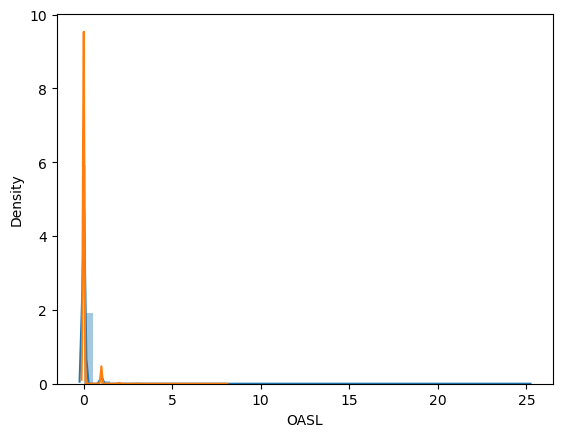

In [68]:
sns.distplot(df['IFIT2'])
sns.distplot(df['OASL'])

In [72]:
adata_genes.loc[list(ix)].loc['IFIT2']

AttributeError: 'AnnData' object has no attribute 'loc'